# <div style="text-align: center"> Project COVID-19 </div>

<img src='Images/COVID-19.jpg'>
                                                
                                                Source: IDPH Illionis

## Contents:
- [File Description](#File-Description)
- [Introduction](#Introduction)
- [Pipeline Framework](#Pipeline-Framework)
   - [Setup Phase](#Setup-Phase)
   - [Acquisition Phase](#Acquisition-Phase)
   - [Processing Phase](#Processing-Phase)
- [Problem Statement](#Problem-Statement)
- [Solution to the Problem: Project COVID-19](#Solution-to-the-Problem:-Project-COVID-19)
- [Dataset Description](#Dataset-Description)
- [Building the Chatbot](#Building-the-Chatbot)
- [Model Summary](#Model-Summary)
- [Model Performance](#Model-Performance)
- [Model Evaluation](#Model-evaluation)
- [Chatbot Performance](#Chatbot-Performance)
- [Chatbot Benchmarking](#Chatbot-Benchmarking) 
- [Challenges](#Challenges) 
- [Next Steps: Future Work](#Next-Steps-Future-Work)
- [References](#References)

## File Description

- **COVID-19 Chatbot.ipynb**: contains data parsing and chatbot building process. **This is the main file**.
- **Twitter and FAQs Scraping.ipynb**: contains the data scraping process of the MOH and MOI's twitter accounts and the MOH's FAQs webpage.
- **TrackCorona_API Scraping.ipynb**: contains the data scraping process of the TrackCorona website.
- **SaudiMOI_MOH.csv**: contains scraped tweets.
- **moh_qna.csv**: contains scraped MOH's FAQs.
- **scraped_new.txt**: contains scraped TrackCorona figures.
- **Images Folder**: contains the images used thoughout the capstone.

# Introduction
<div style="text-align: justify"> COVID-19 is “a newly discovered coronavirus that infects humans and whose [rapid] spread has [led] to a global pandemic with zero available therapeutic strategies” (Mamoor, 2020, p. 5).</div>

# Pipeline Framework
<div style="text-align: justify"> In this project, the web scraping pipeline framework is employed to organize the working process (see Image 1). The framework is carried out in three phases: setup, acquisition, and processing. In the setup phase, a problem is defined, which is there is an urgent need for a platform to obtain accurate information and updates about COVID-19. The twitter account of Ministry of Health (MOH)and Ministry of Interior (MOI), as well as, the website of the MOH and TrackCorona will be used for this task. In the acquisition phase, data will be scraped, then parsed and extracted using the web scraping tools Beautiful Soup and Selenium. The purpose is to change the data into a usable format. In the processing phase, data will be processed in two main stages: data understating and data preparation. </div>

<img src='Images/Pipeline_Framework.png'>
                               
                 Image 1: Scraping Pipeline Framework (source: edited image from Laetsch, 2020)

# Setup Phase

## Problem Statement
There is an urgent need for a platform from where accurate information and updates about COVID-19 can be obtained.

## Solution to the Problem: Project COVID-19

What is Project COVID-19?
- It is an initiative that builds an interactive COVID-19 chatbot which leverages AI and deep learning technologies.
- It uses information from official sources for chatbot training.

**Meet Bot, your COVID-19 chatbot!**
<img src='Images/Bot.png'>

- Facilitates access to reliable information regarding the COVID-19 pandemic
- Provides accurate and updated local and international COVID-19 figures
- Reports the latest news on COVID-19
- Fights misinformation 

Bot updates hourly to accommodate the daily, weekly, or hourly updates published by LiveCorona, WHO, MOH, or MOI.

# Acquisition Phase
## Web Scraping
### <p><strong><em> Quest for COVID-19 Data</strong>
<div style="text-align: justify"> In this phase, data will be extracted from the twitter account of Ministry of Health (MOH) and Ministry of Interior (MOI), as well as, the website of the MOH and TrackCorona. Then, the raw data were transformed into structured data for further analysis. These sources were chosen because they provide accurate COVID-19 information and updates from official sources. Note, TrackCorona is sponsored by Google Maps and Wikipidia and provides accurate COVID-19 information and updates from official sources.</div>
    
**For the data scraping process, refer to the following listed data scraping notebooks on the capstone repository: 'TrackCorona_API Scraping.ipynb' and  'Twitter and FAQs Scraping.ipynb'**

# Processing Phase
## <p><strong><em>Data Processing: the Good, the Bad and the Value </strong>
## Data Understanding

<div style="text-align: justify"> In this phase, there are four main stages: data parsing, where the data will be cleaned further. Data understating, where the data will be examined for its quality, quantity, and usefulness, among other things; data preparation, which is concerned with cleaning and preparing data for analysis; and data analysis, when data will be analyzed and visualized.</div>

## Dataset Description
The datasets for this project are gathered from four different sources:

- **MOH tweets**: contain latest English MOH tweets related to COVID-19 (Twitter account: @SaudiMOH).
- **MOI tweets**: contain latest English MOI tweets related to COVID-19 (Twitter account: @MOISaudiArabia).
- **MOH FAQs**: contain latest English FAQs related to COVID-19 from MOH website (https://www.moh.gov.sa/en/CCC/FAQs/Corona/Pages/default.aspx).
- **TrackCorona**: contains latest local and internation COVID-19 figures by country from TrackCorona website (https://www.trackcorona.live).

# Building the Chatbot


## Step 1. Collecting the Data

<div style="text-align: justify"> The COVID-19 chatbot will be built in five steps (see Image 2). The first step is collecting data and cleaning the data for preprocessing (see Table 1). Step one was carried out in three different notebooks titled as 'TrackCorona_API Scraping', 'Twitter and FAQs Scraping', and 'Parsing_COVID19 Complete Data'. For more infrmation on the step one, please see the listed files in this repository. The second setp is preprocessing the data, the third step is creating the training data, the fourth step is modeling, and the fifth and last step is interacting with the chatbot though GUI. </div>


<img src='Images/Building Bot.png'>
                                                 
                                            Image 2: Steps for Building Bot

### Parsing TrackCorona Data

In [1]:
# Installing necessary libraries
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import plotly.express as px

In [2]:
# Reading the list from the text file
with open('scraped_new.txt', 'r') as f:
    content = f.read()

In [3]:
soup = BeautifulSoup(content) 

In [4]:
# Collecting data
results = soup.find_all(("tr", {"class": "even"}))

In [5]:
# Checking the size of data
len(results)

# The website's data will be extracted and parsed (https://www.trackcorona.live/)
data = []
for result in results:
    datum = {}
    tags = result.find_all("td")

    if tags != []:
        Location = tags[1]
        Confirmed_Cases = tags[2]
        Fatalities = tags[4]
        Recovered_Cases = tags[6]
        
    else:
        Location = "None"
        Confirmed_Cases = "None"
        Fatalities = "None"
        Recovered_Cases = "None"
    
     
    for foo in result.find_all("img", {"style": "Location"}):
        Location = (foo.find("td", {"style": "value"}).get_text())
    for foo in result.find_all("td", {"class": "Confirmed_Cases"}):
        Confirmed_Cases = (foo.find("td", {"class": "value"}).get_text())
    for foo in result.find_all("td", {"class": "Recovered_Cases"}):
        Recovered_Cases = (foo.find("td", {"class": "value"}).get_text())
    for foo in result.find_all("td", {"class": "fatalities"}):
        fatalities = (foo.find("td", {"class": "value"}).get_text())
    
    
    # Defining functions to clean the extracted data
    def strip_string(var):
        var =str(var)
        var = var.rstrip()
        var = var.replace('\n', '')
        var = var.replace(',', '')
        return var
     
    def strip_location(var):
        var =str(var)
        var = var.strip()
        var = var.replace('\n', '')
        var = var.replace('\u2003', '')
        return var

    # Cleaning extracted data
    datum['Location'] = strip_location(Location)
    datum['Confirmed_Cases'] = strip_string(Confirmed_Cases)
    datum['Recovered_Cases'] =  strip_string(Recovered_Cases)
    datum['Fatalities'] =  strip_string(Fatalities) 
    data.append(datum)

In [6]:
# # Checking the data
# print(tags)

In [7]:
# Creating a dataframe
covid19 = pd.DataFrame(data, columns = ['Location','Confirmed_Cases','Recovered_Cases', 'Active_Cases','Fatalities'])

In [8]:
# Defining a function to clean tags
def cleanTags(text):
    clean = re.compile('<.*?>')
    data =[]
    for i in text:
        data.append(re.sub(clean,'',i))
    return data

In [9]:
# Cleaning tags
covid19['Location'] = cleanTags(covid19['Location'])
covid19['Confirmed_Cases'] = cleanTags(covid19['Confirmed_Cases'])
covid19['Recovered_Cases'] = cleanTags(covid19['Recovered_Cases'])
covid19['Fatalities'] = cleanTags( covid19['Fatalities'])

In [10]:
covid19['Location'] = covid19['Location'].apply(str.strip)
covid19['Confirmed_Cases'] = covid19['Confirmed_Cases'].apply(str.rstrip)
covid19['Recovered_Cases'] = covid19['Recovered_Cases'].apply(str.strip)
covid19['Fatalities'] = covid19['Fatalities'].apply(str.strip)

### Preparing the Data

In [11]:
# Cleaning the dataset
covid19.head()

,Location,Confirmed_Cases,Recovered_Cases,Active_Cases,Fatalities
0,None,None,None,NaN,None
1,None,None,None,NaN,None
2,United States,598340,44364,NaN,24787
3,Spain,172655,67504,NaN,18150
4,Italy,162488,37130,NaN,21067


In [12]:
# Dropping the additional empty rows
covid_19 = covid19[~covid19.index.isin([0, 1])]

In [13]:
covid_19['Confirmed_Cases'] = covid_19['Confirmed_Cases'].astype(int)
covid_19['Recovered_Cases'] = covid_19['Recovered_Cases'].astype(int)
covid_19['Fatalities'] = covid_19['Fatalities'].astype(int)
covid_19['Active_Cases'] = covid_19['Confirmed_Cases'] - covid_19['Fatalities'] - covid_19['Recovered_Cases']

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Understanding the Data

In [14]:
# Checking the dataset
covid_19.head(3)

,Location,Confirmed_Cases,Recovered_Cases,Active_Cases,Fatalities
2,United States,598340,44364,529189,24787
3,Spain,172655,67504,87001,18150
4,Italy,162488,37130,104291,21067


In [15]:
# Reseting index to sort it
covid_19.reset_index(inplace = True, drop = True)

In [16]:
# Checking the dataset
covid_19.head(5)

,Location,Confirmed_Cases,Recovered_Cases,Active_Cases,Fatalities
0,United States,598340,44364,529189,24787
1,Spain,172655,67504,87001,18150
2,Italy,162488,37130,104291,21067
3,France,144414,29111,99552,15751
4,Germany,131170,68200,59698,3272


In [17]:

covid_19.iloc[1]['Recovered_Cases']

67504

In [18]:
# Understanding the dataset
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
Location           185 non-null object
Confirmed_Cases    185 non-null int64
Recovered_Cases    185 non-null int64
Active_Cases       185 non-null int64
Fatalities         185 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.4+ KB


In [19]:
# Understanding the dataset
covid_19['Location'].head()

0    United States
1            Spain
2            Italy
3           France
4          Germany
Name: Location, dtype: object

In [20]:
# Checking the data
covid_19.loc[0]['Location']

'United States'

In [21]:
# Checking the data
covid_19.loc[covid_19['Location'] == ('Saudi Arabia')]

,Location,Confirmed_Cases,Recovered_Cases,Active_Cases,Fatalities
33,Saudi Arabia,5369,889,4407,73


In [22]:
# Assigning each column a variable
location = covid_19.loc[covid_19['Location'] == ('Saudi Arabia')]['Location']

In [23]:
# Checking the data
print(covid_19['Confirmed_Cases'])

0      598340
1      172655
2      162488
3      144414
4      131170
        ...  
180         4
181         4
182         2
183         1
184         0
Name: Confirmed_Cases, Length: 185, dtype: int64


In [24]:
str(location.values[0])

'Saudi Arabia'

In [25]:
# Assigning each column a variable
confirmed = covid_19.loc[covid_19['Location'] == ('Saudi Arabia')]['Confirmed_Cases']

In [26]:
str(confirmed.values[0])

'5369'

In [27]:
# Assigning each column a variable
recovered = covid_19.loc[covid_19['Location'] == ('Saudi Arabia')]['Recovered_Cases']

In [28]:
str(recovered.values[0])

'889'

In [29]:
# Assigning each column a variable
fatalities = covid_19.loc[covid_19['Location'] == ('Saudi Arabia')]['Fatalities']

In [30]:
str(fatalities.values[0])

'73'

In [31]:
# Assigning each column a variable
countries = covid_19['Location']

## Understanding FAQs' Data

In [32]:
# Reading the FAQs csv file
faq_df = pd.read_csv('moh_qna.csv')

In [33]:
# Resetting index and dropping it to sort the index
faq_df.drop(inplace = True, columns = ['Unnamed: 0'])

In [34]:
# Checking the data
faq_df

,Questions,Answers,Tags
0,What are Coronaviruses?,Coronaviruses (CoV) are a large family of viru...,definition
1,What are the species of coronaviruses that hav...,The SARS-CoV was transmitted from civet cats t...,species
2,What is (COVID-19)?,It is the new coronavirus and most cases appea...,definition
3,How the virus identified?,The virus was identified through genetic seque...,identify
4,What is the origin of the virus?,It is believed that the COVID-19 originated in...,origin
5,Can the virus spread from person to person?,"Yes, the virus can spread from the infected pe...",person
6,I just came from China having high temperature...,"Visit the nearest health facility, for more in...",temperature
7,Can the COVID-19 spread through shipments comi...,"According to available information, the goods ...",shipments
8,What are the symptoms of COVID-19?,The common symptoms of COVID-19 include: fever...,indication
9,Sneezing etiquette to prevent infection:,Use tissue papers for sneezing or coughing and...,etiquette


In [35]:
# Cleaning the data
def_df = faq_df.loc[faq_df['Tags'] =='definition']

In [36]:
# Cleaning the data
faq_df.drop([0,2],inplace=True)

In [37]:
# Resetting index and dropping it to sort the index
faq_df.reset_index(inplace=True,drop=True)
faq_df

,Questions,Answers,Tags
0,What are the species of coronaviruses that hav...,The SARS-CoV was transmitted from civet cats t...,species
1,How the virus identified?,The virus was identified through genetic seque...,identify
2,What is the origin of the virus?,It is believed that the COVID-19 originated in...,origin
3,Can the virus spread from person to person?,"Yes, the virus can spread from the infected pe...",person
4,I just came from China having high temperature...,"Visit the nearest health facility, for more in...",temperature
5,Can the COVID-19 spread through shipments comi...,"According to available information, the goods ...",shipments
6,What are the symptoms of COVID-19?,The common symptoms of COVID-19 include: fever...,indication
7,Sneezing etiquette to prevent infection:,Use tissue papers for sneezing or coughing and...,etiquette
8,Tips for travellers:,Avoid approaching people having signs of a col...,tips


# Parsing MOH and MOI Tweets

In [38]:
# Reading MOH and MOI tweets and assigning them a variable
tweets_df = pd.read_csv('SaudiMOI_MOH.csv')

In [39]:
# Defining a stemming function
stemmer = nltk.PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed(doc):
    return [stemmer.stem(w) for w in analyzer(doc)]

In [40]:
# Keeping only English tweets
tweets_en = tweets_df.loc[tweets_df['Language'] == ('en')]

In [41]:
# Resetting index and dropping it to sort the index
tweets_en.reset_index(inplace = True, drop = True)
tweets_en.drop(inplace = True, columns = ['Unnamed: 0'])
tweets_en.head(2)

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Created_at,Source,Favorite_Count,Retweet_Count,Tweets,Language
0,1248675865526964225,2020-04-10 18:15:00,Ministry of Health,152,111,Know the difference between medical quarantine...,en
1,1248663151450750976,2020-04-10 17:24:29,Ministry of Health,241,131,"Responsible measures be taken before, during a...",en


In [42]:
# Adding tags
tweets_tags = []
for i,tweet in tweets_en.iterrows():
    tweets_tags = tweets_tags+stemmed(tweet['Tweets'])

In [43]:
# # Checking tags
# set(tweets_tags)

In [44]:
# Creating tags
keys_dict = {
 'ablut': 'ablution',
 'about': 'about',
 'absolut': 'absolut',
 'after': 'after',
 'april': 'april',
 'around': 'around',
 'avoid': 'avoid',
 'awar': 'aware',
 'babi': 'babies',
 'be': 'being',
 'been': 'been',
 'befor': 'before',
 'behind': 'behind',
 'between': 'between',
 'breastfe': 'breastfeeding',
 'breath': 'breath',
 'call': 'call',
 'care': 'caring',
 'carri': 'carriage',
 'charg': 'charge',
 'common': 'commom',
 'confer': 'conference',
 'contact': 'contact',
 'cough': 'cough',
 'cover': 'cover',
 'covid': 'covid',
 'crowd': 'crowds',
 'day': 'day',
 'deliveri': 'delivering',
 'differ': 'different',
 'difficulti': 'difficulties',
 'don': 'done',
 'drive': 'drive',
 'dure': 'during',
 'elbow': 'elbow',
 'errand': 'errand',
 'even': 'even',
 'everyon': 'everyone',
 'everyth': 'everything',
 'exhibit': 'exhibit',
 'experi': 'experience',
 'facemask': 'facemask',
 'facil': 'facility',
 'fact': 'fact',
 'famili': 'families',
 'fever': 'fever',
 'few': 'few',
 'flu': 'flu',
 'forget': 'forget',
 'free': 'free',
 'gather': 'gather',
 'get': 'get',
 'goal': 'goal',
 'guid': 'guide',
 'hand': 'hand',
 'handi':'handy',
 'happi':'happy',
 'head': 'head',
 'healthcar': 'healthcare',
 'healthi': 'healthier',
 'here': 'here',
 'higher': 'higher',
 'highlight': 'highlight',
 'home': 'home',
 'hous': 'house',
 'increas': 'increase',
 'infect': 'infect',
 'internet': 'internet',
 'isol': 'isolation',
 'job': 'job',
 'kingdom': 'kingdom',
 'know' : 'know',
 'lab': 'lab',
 'leav': 'leave',
 'love': 'love',
 'major': 'major',
 'make': 'make',
 'measur': 'measure',
 'medic': 'medical',
 'million': 'million',
 'mingl': 'mingle',
 'moh': 'moh',
 'molecular': 'molecular',
 'mouth': 'mouth',
 'myth': 'myth',
 'nearest': 'nearest',
 'need': 'need',
 'new': 'new',
 'nose': 'nose',
 'offici': 'official',
 'one': 'one',
 'packag': 'package',
 'perform': 'perform',
 'period': 'period',
 'pleas': 'please',
 'popul': 'populated',
 'precaut': 'precaution',
 'pregnant': 'pregnant',
 'press': 'press',
 'protect': 'protection',
 'quarantin':  'quarantine',
 'read': 'read',
 'receiv': 'receive',
 'reduc': 'reduce',
 'regularli':  'regularity',
 'requir': 'require',
 'respons': 'response',
 'risk':  'risk',
 'safe': 'safe',
 'safeti': 'safetiness',
 'sake': 'sake',
 'self': 'self',
 'short':  'short',
 'simpl':  'simple',
 'sneez': 'sneeze',
 'soap': 'soap',
 'social': 'social',
 'soon': 'soon',
 'spokesperson': 'spokesperson',
 'spread': 'spread',
 'stay': 'stay',
 'step': 'step',
 'stop': 'stop',
 'sure': 'sure',
 'symptom': 'symptom',
 'take': 'take',
 'taken': 'taken',
 'technolog': 'technolog',
 'test': 'test',
 'thoroughli': 'thorough',
 'time': 'time',
 'tip': 'tip',
 'tissu': 'tissue',
 'translat': 'translate',
 'transmiss': 'transmission',
 'travel': 'travel',
 'treatment': 'treatment',
 'true': 'true',
 'unavail': 'unavailable',
 'unless': 'unless',
 'unnecessari':  'unnecessarily',
 'use':  'use',
 'viru': 'virus',
 'vulner': 'vulnerable',
 'wash': 'wash',
 'water': 'water',
 'wear': 'wear',
 'worri': 'worried',
 'wudhu': 'wudhu'}

In [45]:
# Defining a tag finding function
def find_tag(stems,tags, tag_used):

    for stem in stems:
        if (stem in tags.keys()) and (stem not in tag_used):
                #add tag
                tag_used = tag_used + stem
                return stem
            
    #if unique tag is doesn't exist, find least frequent tag
    cnt = Counter(tag_used.split())    
    key_min = min(cnt.keys(), key=(lambda k: cnt[k]))
    tag_used = tag_used + stem
    
    print(key_min)

In [46]:
# Adding tags
tweets_en['tags'] =''
tag_used = ''
for i,tweet in tweets_en.iterrows():
    stems = stemmed(tweet['Tweets']) 
    tag = find_tag(stems,keys_dict,tag_used)
    tweets_en.loc[i,'tags'] = keys_dict[tag]

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
#Checking the data
tweets_en.head(2)

,ID,Created_at,Source,Favorite_Count,Retweet_Count,Tweets,Language,tags
0,1248675865526964225,2020-04-10 18:15:00,Ministry of Health,152,111,Know the difference between medical quarantine...,en,know
1,1248663151450750976,2020-04-10 17:24:29,Ministry of Health,241,131,"Responsible measures be taken before, during a...",en,response


In [48]:
# Sorting tags
sorting_tags = {}
for i,tweet in tweets_en.iterrows():
    key = tweet['tags']
    if key not in sorting_tags.keys():
        sorting_tags[key] = []
        sorting_tags[key].append({"created_at":tweet["Created_at"], "tweet":tweet['Tweets'],"source":tweet['Source']})
    else:
        sorting_tags[key].append({"created_at":tweet["Created_at"], "tweet":tweet['Tweets'],'source':tweet['Source']})

In [49]:
# Adding all of the data in a Json file to be used when modeling
import json
intents = {}
intents['intents'] = []
intents['intents'].append(
        {"tag": "greeting",
         "patterns": ["Hi", "How are you", "Is anyone there?", "Hello", "Good day", "What's up", "Salaam"],
         "responses": ["Hello!", "Good to see you again!", "Hi there, how can I help?"],
         "context_set": ""
        })
intents['intents'].append(
        {"tag": "goodbye",
         "patterns": ["See you later", "Goodbye", "I am Leaving", "Bye", "Have a Good day", "Ma salama", "Fi aman Allah"],
         "responses": ["Sad to see you go :(", "Talk to you later", "Goodbye!", "Ma salama"],
         "context_set": ""
        })
intents['intents'].append(
        {"tag": "name",
         "patterns": ["What is your name", "What should I call you", "what's your name?"],
         "responses": ["You can call me Bot, your COVID-19 chatbot. How can I help you?", "I'm Bot! your COVID-19 chatbot. How can I help you?"],
         "context_set": ""
        })
intents['intents'].append(
        {"tag": "error",
         "patterns": ["error"],
         "responses": ["I don't have that information.", "I am not sure what you mean.", "Can you clarify and make it simple."],
         "context_set": ""
        })
intents['intents'].append(
        {"tag": def_df.iloc[0]["Tags"],
         "patterns": [def_df.iloc[0]["Questions"],def_df.iloc[1]["Questions"]],
         "responses": [def_df.iloc[0]["Answers"]+ ' Source: Saudi Ministry of Health.', def_df.iloc[1]["Answers"]+ ' Source: Saudi Ministry of Health.'],
         "context_set": ""
        })
for i,row in faq_df.iterrows():
      intents['intents'].append(
            {"tag": (row['Tags']),
            "patterns":[row['Questions']],
            "responses":[row['Answers']+ ' Source: Saudi Ministry of Health.'], 
            "context_set":""
            })
for country in countries.tolist():
    confirmed = covid_19.loc[covid_19['Location'] == (country)]['Confirmed_Cases']
    recovered = covid_19.loc[covid_19['Location'] == (country)]['Recovered_Cases']
    active = covid_19.loc[covid_19['Location'] == (country)]['Active_Cases']
    fatalities = covid_19.loc[covid_19['Location'] == (country)]['Fatalities']
    intents['intents'].append(
            {"tag": (country),
            "patterns":["what is the latest {} stats for COVID19?".format(country), "COVID{}?".format(country)],
            "responses":["{} has {} total confirmed cases, {} recovered cases, {} active cases, and {} fatalities (الله يرحمهم).".format((country), str(confirmed.values[0]), str(recovered.values[0]), str(active.values[0]), str(fatalities.values[0]))], 
            "context_set":""
            })
for key in sorting_tags.keys():
    intents['intents'].append(
        {"tag": key,
        "patterns":["What is the latest COVID19 news {} form the Saudi {}?".format(key, sorting_tags[key][0]['source']), "What did the {} say about {}?".format(sorting_tags[key][0]['source'], key),"Is there any news about {}?".format(key), "What is the latest information about {}?".format(key), "Tell me about {}?".format(key)],
        "responses":["On {}, the Saudi {} tweeted: {}".format(sorting_tags[key][0]['created_at'], sorting_tags[key][0]['source'], sorting_tags[key][0]['tweet'])], 
        "context_set":""
        })
with open('intents.json', 'w') as outfile:
    json.dump(intents, outfile)

## Step 2. Preprocessing the Data

-	Tokenization: breaking sentences into words
-	Stemming: reducing inflectional forms of words to a common root thereby reducing the number of words and duplicate words in our vocabulary. Example: healthcare, healthier, and healthy will be replaced with health.

Feature engineering: a bag of words converts text into a matrix of occurrence of words within a document. This model determines whether or not a given set of words occurs in a document.

   -	Intents contain a collection of tags with their corresponding patterns and responses.
   -	Classes and documents contain intents associated with patterns.
   -	The pickle.dump() method is used to save the following (see Diagram 1):
1.	words containing the vocabulary of our project as Words.pkl
2.	classes containing the total entities to classify as Classes.pkl

These files are useful after the training, that is, when we predict responses.

<img src='Images/Collecting the Data.png'>
                                                   
                                                   Diagram 1: Preprocessing the Data

In [50]:
# Installing necessary libraries for building the chatbot
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

# Reading the collected data and saving it in a variable
intents_file = open('intents.json').read()
intents = json.loads(intents_file)

Using TensorFlow backend.
/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/Maram/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futu

In [51]:
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenizing words
        word = nltk.word_tokenize(pattern)
        words.extend(word)        
        # Adding documents in the corpus
        documents.append((word, intent['tag']))
        # Adding it to the classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
# print(documents)

In [52]:
# lemmaztizing words and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
# Sorting classes
classes = sorted(list(set(classes)))
# Documents contain combination between patterns and intents
# print (len(documents), "documents")
# Classes contain intents
# print (len(classes), "classes", classes)
# Words contain all words and vocabulary
# print (len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

## Step 3. Creating the Training Data

1.	Converting input patterns into numbers:
  - Lemmatizing each word of the pattern and creating a list of zeroes equal to the length of the total number of words.
  - Setting a value of 1 only to indexes that contain the word in the patterns.
2.	Creating the output by setting 1 to the class input to which the pattern belongs.

In [53]:
# Creating the training data
training = []
# Creating empty array for the output
output_empty = [0] * len(classes)
# Training set, bag of words for every sentence
for doc in documents:
    # Initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    word_patterns = doc[0]
    # Lemmatizing words - creating base words, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    # Creating the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    # Output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
# Shuffling the features and make numpy array
random.shuffle(training)
training = np.array(training)
# Creating training and testing lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data is created")

Training data is created


## Step 4. Training the Model

## Model Summary

<div style="text-align: justify">The sequential deep neural network model was used for this project. This model is a linear stack of layers. It was chosen because of its multiclass classification, which works well for the purposes of this project. </div>

<div style="text-align: justify">The model performed best when using stochastic gradient descent (SGD), which was chosen over gradient descent because it is much faster. SGD has a smoothness property called soft max used for activation. A Nestrov accelerated gradient was employed in order to not miss the minima. After a trial-and-error process, five batches and 200 epochs suited our model. In addition, the ReLU activation function was replaced with leaky ReLU in part because it accelerated the training process and performed better.</div>

<div style="text-align: justify"> The model did not perform well in the sequential model when adding more than three layers. L1 regularization (lasso) and L2 regularization (ridge) did not work well with the model, either. </div>

### Deep Neural Network Model

1.	The sequential neural network consists of three dense layers:
   - First layer (256 neurons)
   - Hidden layer (128 neurons) 
   - Last layer (the number of neurons is similar to the number of classes) 
2.	Overfitting was reduced by adding dropout layers 
3.	SGD optimizer and data fitting were used to train the model
   - Performs a parameter update for each training 
   - Fast technique
   - Performs one update at a time
   - SGD is a parameter used to determine find most optimal model
4.	The Nestrov accelerated gradient was employed.
5.	After being trained for 200 epochs, the model was saved using the Keras model.save(“chatbot_model.h5”) function.

<img src='Images/Model_Plot.png'>
                                                              
                                                       Diagram 2: DNN Layers

In [54]:
from keras.layers import LeakyReLU
from keras import regularizers

model = Sequential()

## First layer 
model.add(Dense(256, input_shape=(len(train_x[0]),),))

# Adding a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.5))

## Hidden layer
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compiling model. 
# Uing SGD with Nesterov accelerated gradient would enhance the results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Training and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model is created")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
504/504 [==============================] - 1s 2ms/step - loss: 5.4070 - accuracy: 0.0020
Epoch 2/200
504/504 [==============================] - 0s 671us/step - loss: 5.3797 - accuracy: 0.0099
Epoch 3/200
504/504 [==============================] - 0s 641us/step - loss: 5.3026 - accuracy: 0.0218
Epoch 4/200
504/504 [==============================] - 0s 609us/step - loss: 5.1637 - accuracy: 0.0119
Epoch 5/200
504/504 [==============================] - 0s 617us/step - loss: 5.0391 - accuracy: 0.0179
Epoch 6/200
504/504 [==============================] - 0s 720us/step - loss: 5.0183 - accuracy: 0.0218
Epoch 7/200
504/504 [==============================] - 0s 814us/step - loss: 4.9919 - accuracy: 0.0218
Epoch 8/200
504/504 [==============================] - 0s 693us/step - loss: 4.9348 - accuracy: 0.0456
Epoch 9/200
504/504 [==============================] - 0s 

504/504 [==============================] - 0s 505us/step - loss: 0.5474 - accuracy: 0.8492
Epoch 153/200
504/504 [==============================] - 0s 487us/step - loss: 0.5214 - accuracy: 0.8472
Epoch 154/200
504/504 [==============================] - 0s 491us/step - loss: 0.3784 - accuracy: 0.8909
Epoch 155/200
504/504 [==============================] - 0s 511us/step - loss: 0.5597 - accuracy: 0.8571
Epoch 156/200
504/504 [==============================] - 0s 537us/step - loss: 0.5427 - accuracy: 0.8671
Epoch 157/200
504/504 [==============================] - 0s 522us/step - loss: 0.4678 - accuracy: 0.8770
Epoch 158/200
504/504 [==============================] - 0s 503us/step - loss: 0.3973 - accuracy: 0.8929
Epoch 159/200
504/504 [==============================] - 0s 472us/step - loss: 0.3848 - accuracy: 0.8988
Epoch 160/200
504/504 [==============================] - 0s 501us/step - loss: 0.4299 - accuracy: 0.8770
Epoch 161/200
504/504 [==============================] - 0s 613us/ste

## Model Evaluation

The tag class accuracy rate started at zero accuracy and gradually rose to over 80% at 200 epochs. Unlike the tag class accuracy rate, the class loss rate dropped gradually, falling below one at 200 epochs (see visualization below).

In [55]:
print(hist.history['loss'][-1])

0.2602419751889832


### Visualization

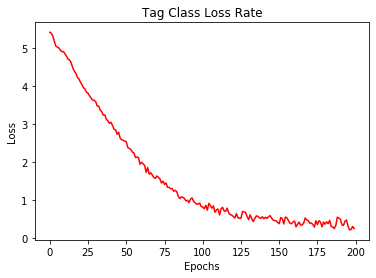

In [59]:
# Creating a tag class loss rate plot
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tag Class Loss Rate')
plt.show();

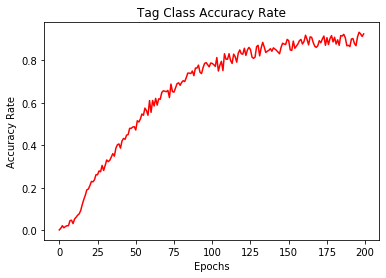

In [57]:
# Creating a tag class accuracy rate plot
plt.plot(hist.history['accuracy'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Rate')
plt.title('Tag Class Accuracy Rate')
plt.show();

## Model Performance

To measure the chatbot's perfromance, variation of the model were tested using the same five questions. The current model performed the best by getting 4 questions right (see Table 1). 
<img src='Images/Model Performance.png'>
                                                   
                                                    Table 1. Model Performance

## Step 5. Interacting With the Chatbot
The chatbot was programmed to predict the class to which a pattern belongs in order to retrieve an answer that matches a query. 

In [58]:
# Chatbot output
from keras.models import load_model
chat_model = load_model('chatbot_model.h5')

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # Tokenizing the pattern
    # Splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming every word
    # Reducing to base form
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# Return bag of words array: 0 or 1 for words that exist in sentence
def bag_of_words(sentence, words, show_details=True):
    # Tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    # Bag of words
    # Vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,word in enumerate(words):
            if word == s: 
                # Assigning 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % word)
    return(np.array(bag))

def predict_class(sentence):
    # Filtering below threshold predictions
    p = bag_of_words(sentence, words,show_details=False)
    res = chat_model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # Sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

# Creating tkinter GUI
import tkinter
from tkinter import *
def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if msg != '':
        ChatBox.config(state=NORMAL)
        ChatBox.insert(END, "You: " + msg + '\n\n')
        ChatBox.config(foreground="#2a1a2e", font=("Verdana", 12 ))
        ints = predict_class(msg)
        if ints ==[]:
            ints = predict_class("error")
        res = getResponse(ints, intents)
        ChatBox.insert(END, "Bot: " + res + '\n\n')           
        ChatBox.config(state=NORMAL)
        ChatBox.yview(END)
root = Tk()
root.title("Chatbot")
root.geometry("400x500")
root.resizable(width=FALSE, height=FALSE)

# Creating chatbot window
ChatBox = Text(root, bd=0, bg="white", height="8", width="50", font="Arial",)
ChatBox.config(state=NORMAL)

# Binding scrollbar to chat window
scrollbar = Scrollbar(root, command=ChatBox.yview)
ChatBox['yscrollcommand'] = scrollbar.set

# Creating button to send message
SendButton = Button(root, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#f9a602", activebackground="#3c9d9b",fg='#000000',
                    command= send )

# Creating the box to enter message
EntryBox = Text(root, bd=0, bg="white",width="29", height="5", font="Arial")

# EntryBox.bind("<Return>", send)
# Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatBox.place(x=6,y=6, height=386, width=370)

EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)
root.mainloop()

## Chatbot Performance 
### <p><strong><em> The chatbot metrics are in their early stages of development, and few references for consultation are available.</strong>

### Interactions per User
### <p><strong><em> Measuring the interactions between users and the Bot</strong>
- The Bot was tested several times by different users. 
- Several technical errors were noted during the testing, and these errors have already been addressed.

### Retention and Goal Completion
### <p><strong><em> Repeat users and usage purposes</strong>
- Most users who tested Bot would engage with it daily (number of users: 2−6)
- Motivation behind using Bot is checking the latest COVID-19 information from MOH and MOI.

## Chatbot Benchmarking

In this section, the chatbot is compared with World Health Organization's chatbot (Table 2).
<img src='Images/Chatbot Benchmarking.png'>
                                                   
                                                  Table 2. Chatbot Benchmarking

## Challenges
- Tuning the parameters (trial and error)
- Operating Bot on Jupyter Notebook is inconvenient
- Hourly updates must be monitored daily so that changes in the format of data sources (websites) are incorporated during data parsing.

## Next Steps: Future Work
- Deploy the model on a social media platform
- Add more features to the chatbot
- Include Arabic responses 

## References:

- <p style='text-align: justify;'> Laetsch, T., 2020. Web Scraping With Python, accessed on 19 Mar, 2020:(https://campus.datacamp.com/courses/web-scraping-with-python/introduction-to-html?ex=1).</p>
- <p style='text-align: justify;'>Mamoor, S., 2020. FBXL8 is differentially expressed and transcriptionally induced in MERS coronavirus infection. </p>
- <p style='text-align: justify;'> Navlani, A., 2019. Web Scraping With Python, accessed on 19 Mar, 2020:(https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk).</p>
- <p style='text-align: justify;'> Neff, A., 2019. Web Scraping With Python, accessed on 19 Mar, 2020:(https://www.icmi.com/resources/2019/metrics-uncover-the-value-of-chatbots-within-customer-service).</p>
- <p style='text-align: justify;'> Jassova, B., 2019. Web Scraping With Python, accessed on 19 Mar, 2020:(https://landbot.io/blog/chatbot-metrics-kpi/).</p>